In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df = pd.read_csv("test.csv", comment="#", delimiter="|")

In [166]:
df.head()

,Iteration,Type,X,Y,Energy,Radius
0,0,agent,60.466029,94.050909,1.0,0.0
1,0,agent,66.456005,43.771419,1.0,0.0
2,0,agent,42.463750,68.682307,1.0,0.0
3,0,agent,6.563702,15.651925,1.0,0.0
4,0,agent,9.696952,30.091186,1.0,0.0


# Population over time

In [169]:
pop = []
iters = []
numIters = max(list(df["Iteration"])) + 1
for i in range(0,numIters,1):
    p = len(df.loc[(df["Iteration"] == i) & (df["Type"] == "agent")])
    pop.append(p)
    iters.append(i)

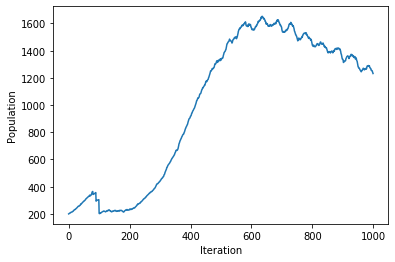

In [197]:
plt.figure()
plt.plot(iters, pop)
plt.xlabel("Iteration")
plt.ylabel("Population")
plt.savefig("pop.png")

# Resource in environment over time

In [171]:
resc = []
numIters = max(list(df["Iteration"])) + 1
for i in range(numIters):
    r = np.sum(df.loc[(df["Iteration"] == i) & (df["Type"] == "resource")]["Energy"])
    resc.append(r)

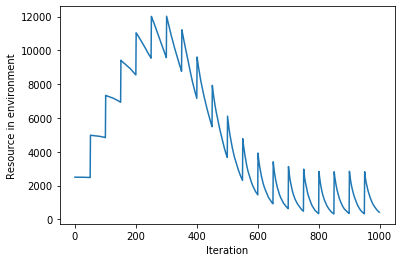

In [196]:
plt.figure()
plt.plot(resc)
plt.xlabel("Iteration")
plt.ylabel("Resource in environment")
plt.savefig("Resource.png")

# Distribution of Perception Radius Over Time

In [173]:
iterRange = np.arange(0, numIters, 25)
radiusStep = max(df["Radius"])/25
radiusRange = np.arange(0, max(df["Radius"]), radiusStep)
image = np.zeros((len(radiusRange)+1, len(iterRange)+1))
xticks = []
xlabels = []
yticks = []
ylabels = []
for i in range(0, len(iterRange), 2):
    xticks.append(i)
    xlabels.append(iterRange[i])
for i in range(0, len(radiusRange), 2):
    yticks.append(i)
    ylabels.append("{:10.2f}".format(radiusRange[i]))

In [174]:
iterBin = 0
for i in iterRange:
    ii = int(i)
    agentsThisIter = list(df.loc[(df["Type"] == "agent") & (df["Iteration"] == i)]["Radius"])
    for a in agentsThisIter:
        radiusBin = int(np.floor(a/radiusStep))
        image[radiusBin, iterBin] += 1.0/float(len(agentsThisIter))
    iterBin += 1

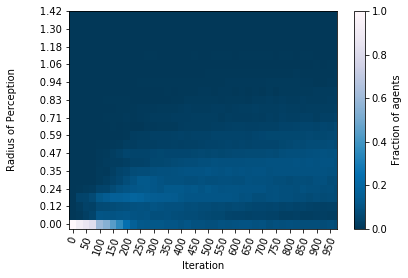

In [195]:
plt.figure()
plt.imshow(image, aspect="auto", vmin=0.0, vmax=1.0, cmap="PuBu_r")
plt.xlabel("Iteration")
plt.ylabel("Radius of Perception")
plt.colorbar(label="Fraction of agents")
plt.xticks(xticks, labels=xlabels, rotation = 70)
plt.yticks(yticks, labels=ylabels)
plt.xlim([-0.5, len(iterRange) - 1])
plt.ylim([-0.5, len(radiusRange)-1])
plt.savefig("Radius.png")